In [27]:
import numpy as np
import pandas as pd

In [28]:
df = pd.read_csv('spam.csv',encoding='latin1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2556,ham,Fuck babe ... What happened to you ? How come ...,NaN,NaN,NaN
3437,ham,Its good to hear from you,NaN,NaN,NaN
3541,ham,ÌÏ come lt 25 n pass to me lar,NaN,NaN,NaN
5555,ham,Yeh. Indians was nice. Tho it did kane me off ...,NaN,NaN,NaN
3483,ham,Tell my bad character which u Dnt lik in me. ...,NaN,NaN,NaN


In [29]:
df.shape

(5572, 5)

1. DATA CLEANING


In [30]:
#Drop unnecessary columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [31]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2825,ham,Ok lor...,NaN,NaN,NaN
313,ham,"Hi the way I was with u 2day, is the normal wa...",NaN,NaN,NaN
2997,ham,No b4 Thursday,NaN,NaN,NaN
3802,ham,Yup song bro. No creative. Neva test quality. ...,NaN,NaN,NaN
1685,ham,Cramps stopped. Going back to sleep,NaN,NaN,NaN


In [32]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
5359,ham,This is ur face test ( 1 2 3 4 5 6 7 8 9 &lt;...,NaN,NaN,NaN
3709,ham,ARE YOU IN TOWN? THIS IS V. IMPORTANT,NaN,NaN,NaN
157,ham,"Hello, my love. What are you doing? Did you ge...",NaN,NaN,NaN
5559,ham,if you aren't here in the next &lt;#&gt; hou...,NaN,NaN,NaN
900,ham,Probably money worries. Things are coming due ...,NaN,NaN,NaN


In [38]:
# Drop only if the columns exist
df.drop(columns=[col for col in ['Unnamed: 2','Unnamed: 3','Unnamed: 4'] if col in df.columns], inplace=True)


In [39]:

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [40]:

df['target'] = encoder.fit_transform(df['target'])

In [41]:

df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [42]:

# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [43]:

# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [44]:

# remove duplicates
df = df.drop_duplicates(keep='first')


In [45]:
df.duplicated().sum()


np.int64(0)

In [46]:

df.shape

(5169, 2)

EDA

In [47]:

df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [48]:

df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

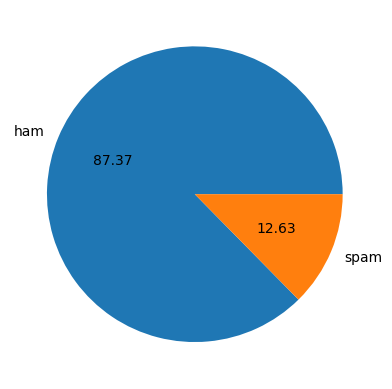

In [49]:

import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [50]:
# Data is imbalanced


In [51]:

!pip install nltk

  Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl.metadata (41 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 11.4 MB/s eta 0:00:00
Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl (273 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


In [57]:

import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [58]:

df['num_characters'] = df['text'].apply(len)

In [54]:

df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [61]:
import nltk
nltk.download()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [62]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [63]:

df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [64]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [65]:
df[['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [66]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

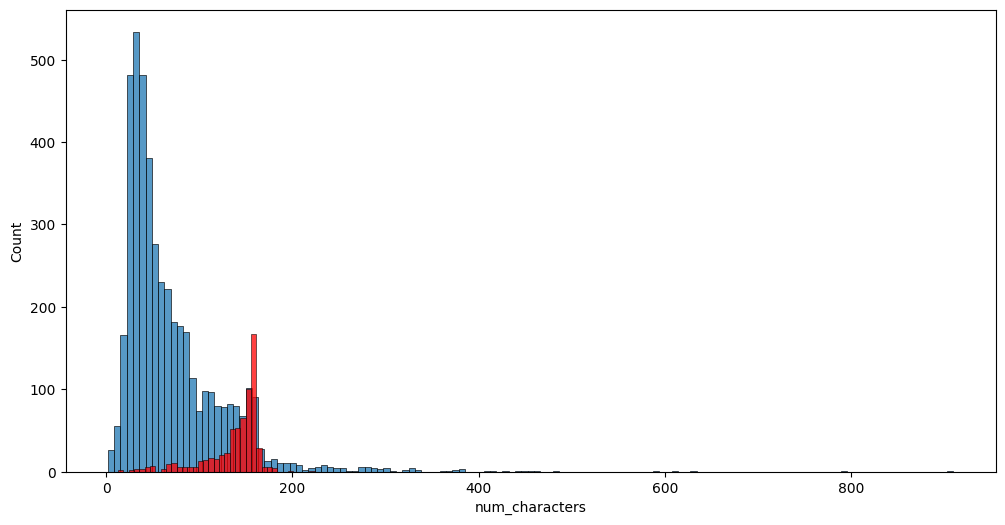

In [67]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red') 


<Axes: xlabel='num_words', ylabel='Count'>

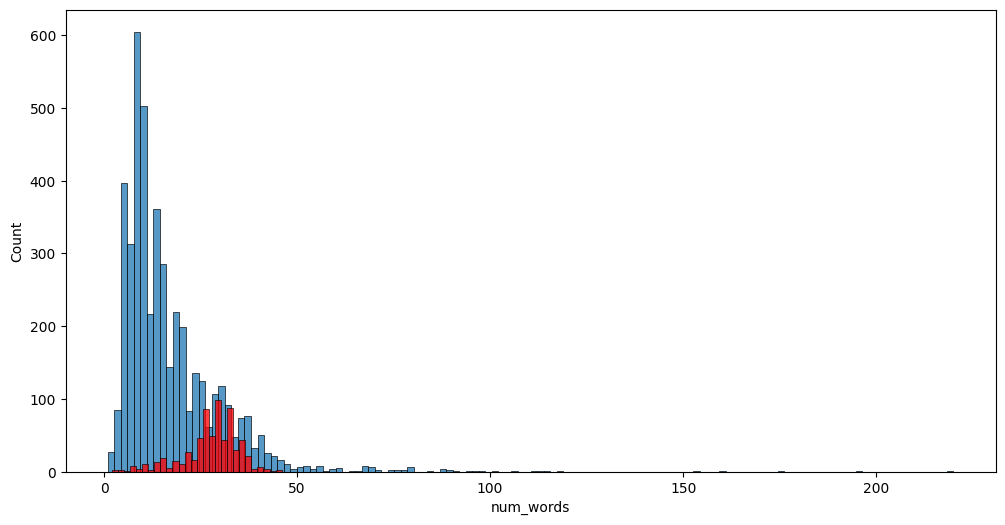

In [68]:

plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')



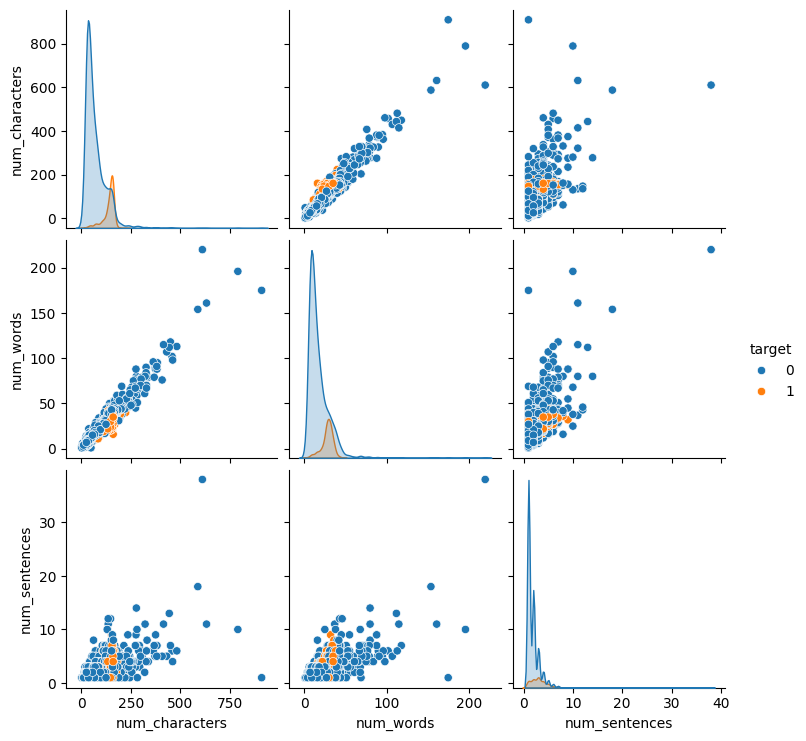

In [69]:

sns.pairplot(df,hue='target')

<Axes: >

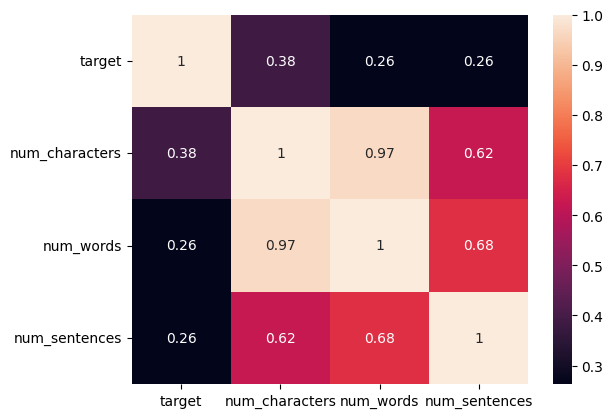

In [72]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)



3. Data Preprocessing
Lower case
Tokenization
Removing special characters
Removing stop words and punctuation
Stemming

In [74]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [77]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

nltk.download('stopwords')

ps = PorterStemmer()

# Now you can run the transform_text function
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [78]:

df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [79]:

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [80]:
df['transformed_text'] = df['text'].apply(transform_text)

In [81]:

df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [84]:
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


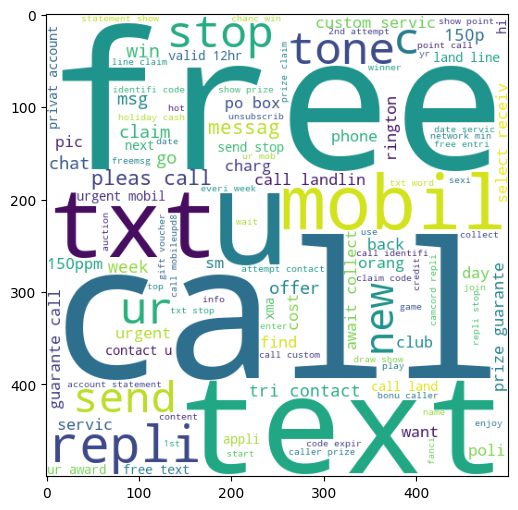

In [85]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

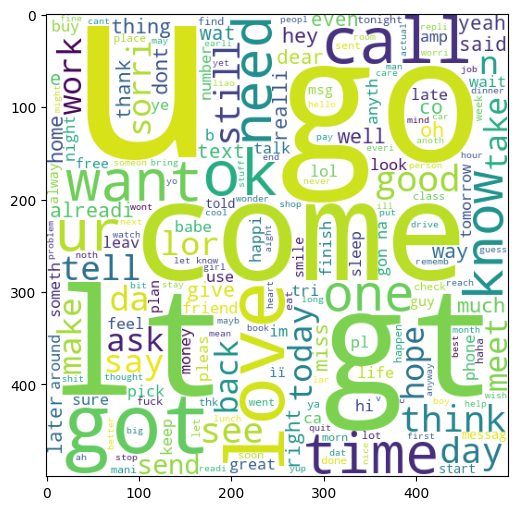

In [86]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [87]:

df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [88]:

spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [89]:
len(spam_corpus)

9939

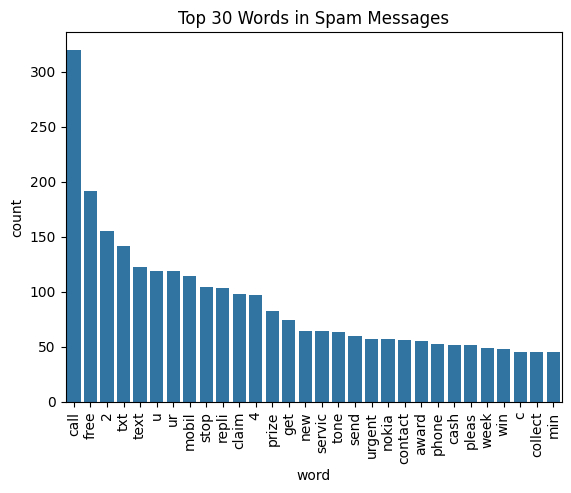

In [91]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get top 30 most common words from spam_corpus
word_freq = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot using seaborn
sns.barplot(x='word', y='count', data=word_freq)
plt.xticks(rotation='vertical')
plt.title("Top 30 Words in Spam Messages")
plt.show()


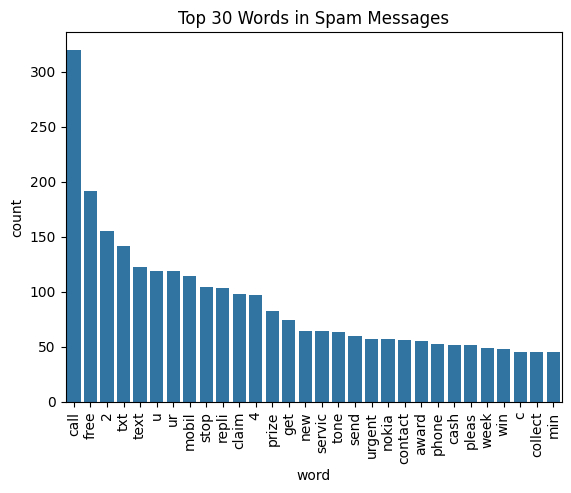

In [93]:

ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [94]:

len(ham_corpus)

35404

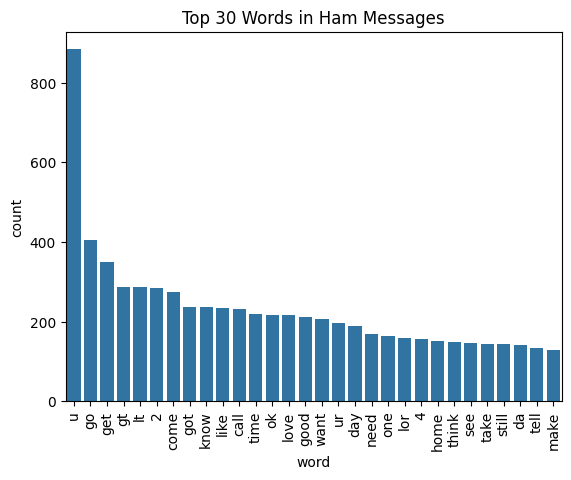

In [96]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get top 30 most common words in ham messages
ham_common = Counter(ham_corpus).most_common(30)

# Convert to DataFrame
ham_df = pd.DataFrame(ham_common, columns=['word', 'count'])

# Plot
sns.barplot(x='word', y='count', data=ham_df)
plt.xticks(rotation='vertical')
plt.title("Top 30 Words in Ham Messages")
plt.show()


In [97]:

# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [98]:

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [99]:

X = tfidf.fit_transform(df['transformed_text']).toarray()

In [100]:

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [101]:

X.shape

(5169, 3000)

In [102]:

y = df['target'].values

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [106]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [107]:

gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [108]:

mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [109]:

bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [111]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [112]:

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [113]:

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [114]:

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [115]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [ ]:

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9313346228239845
Precision -  0.8383838383838383
For  LR
Accuracy -  0.9555125725338491
Precision -  0.96
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  AdaBoost
Accuracy -  0.9216634429400387
Precision -  0.8202247191011236


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score

# Load the dataset
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

# Drop unnecessary columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

# Rename columns for clarity
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

# Encode target labels
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])  # ham = 0, spam = 1

# Vectorize text data
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['text']).toarray()
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers
clfs = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(kernel='linear'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate models
accuracy_scores = []
precision_scores = []

for name, model in clfs.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))

# Display performance
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision', ascending=False)

print(performance_df)


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:33:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


             Algorithm  Accuracy  Precision
1          Naive Bayes  0.974888   1.000000
0  Logistic Regression  0.964126   0.991071
3              XGBoost  0.981166   0.984962
2                  SVM  0.982063   0.977941


In [6]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [7]:

performance_df1


,Algorithm,variable,value
0,Naive Bayes,Accuracy,0.974888
1,Logistic Regression,Accuracy,0.964126
2,XGBoost,Accuracy,0.981166
3,SVM,Accuracy,0.982063
4,Naive Bayes,Precision,1.000000
5,Logistic Regression,Precision,0.991071
6,XGBoost,Precision,0.984962
7,SVM,Precision,0.977941


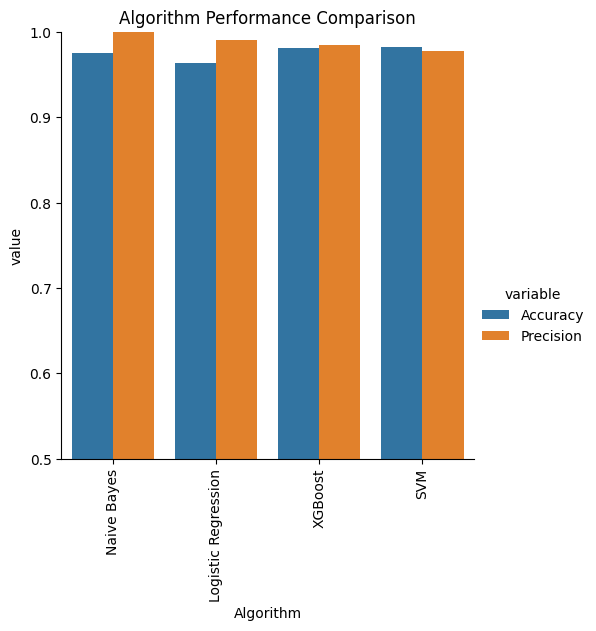

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape the DataFrame for seaborn
performance_df1 = performance_df.melt(id_vars='Algorithm', var_name='variable', value_name='value')

# Plotting
sns.catplot(x='Algorithm', y='value', 
            hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.title("Algorithm Performance Comparison")
plt.show()


In [10]:
import pandas as pd
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import (
    ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier,
    VotingClassifier, StackingClassifier, BaggingClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score

# 🟡 Replace these with your actual data
# X_train, y_train, X_test, y_test = ...
# tfidf = ...

clfs = {
    "LR": LogisticRegression(max_iter=1000),
    "NB": MultinomialNB(),
    "SVC": SVC(kernel='linear', probability=True),
    "xgb": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "AdaBoost": ExtraTreesClassifier(n_estimators=10),
    "RF": RandomForestClassifier(),
    "ETC": ExtraTreesClassifier(),
    "GBDT": GradientBoostingClassifier(),
    "DT": DecisionTreeClassifier(),
    "BgC": BaggingClassifier(),
    "KN": KNeighborsClassifier()
}

accuracy_scores = []
precision_scores = []

for name, model in clfs.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))

performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision', ascending=False)

temp_df_max_ft = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_max_ft_3000': accuracy_scores,
    'Precision_max_ft_3000': precision_scores
})

temp_df_scaling = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_scaling': accuracy_scores,
    'Precision_scaling': precision_scores
})

temp_df_chars = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_num_chars': accuracy_scores,
    'Precision_num_chars': precision_scores
})

merged_df = performance_df.merge(temp_df_max_ft, on='Algorithm') \
                          .merge(temp_df_scaling, on='Algorithm') \
                          .merge(temp_df_chars, on='Algorithm')

# 🟢 Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')
voting.fit(X_train, y_train)
y_pred_voting = voting.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Voting Classifier Precision:", precision_score(y_test, y_pred_voting))

# 🟢 Stacking Classifier
estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train, y_train)
y_pred_stack = clf.predict(X_test)
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Stacking Classifier Precision:", precision_score(y_test, y_pred_stack))

# 🟢 Save vectorizer and model
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:38:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Voting Classifier Accuracy: 0.9820627802690582
Voting Classifier Precision: 0.9924242424242424
Stacking Classifier Accuracy: 0.9874439461883409
Stacking Classifier Precision: 0.9857142857142858


In [11]:
# Save the model and vectorizer
import pickle

# Save the best performing model (for example, mnb)
pickle.dump(mnb, open('model.pkl', 'wb'))
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))

In [12]:
# Save the trained model and vectorizer
import pickle

# Create model directory if it doesn't exist
import os
os.makedirs('src/model', exist_ok=True)

# Save the model (assuming 'model' is your best performing classifier)
with open('src/model/model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the vectorizer (assuming 'tfidf' is your TF-IDF vectorizer)
with open('src/model/vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!


In [13]:
import pickle
import os

# Create model directory if it doesn't exist
os.makedirs('src/model', exist_ok=True)

# Save the best performing model (use your best model variable name)
# For example, if multinomial naive bayes performed best:
best_model = MultinomialNB()
best_model.fit(X_train, y_train)

# Save model and vectorizer
with open('src/model/model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
    
with open('src/model/vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

print("Model and vectorizer saved successfully!")

# Verify the model's performance
test_pred = best_model.predict(X_test)
print(f"Accuracy on test set: {accuracy_score(y_test, test_pred):.2f}")

Model and vectorizer saved successfully!
Accuracy on test set: 0.97
